## Assignment:
Access "DSC-550-RS-Project3" for successful completion of this assignment. 

APA style is not required, but solid academic writing is expected. 

This assignment uses a rubric. Please review the rubric prior to beginning the assignment to become familiar with the expectations for successful completion. 

Submit a Microsoft Word document showing the mathematical outputs, with source code, and screenshots of the plots.

Zip your document, including the source code, and submit to LoudCloud, as directed by your instructor.

## Response:

Similar to the example given in the assignment, the following code will create a multilayer perceptron utilizing weights and biases to generate an output given the input p. Part i - vi will be noted below and the saturating linear layer will be represented via the sigmoid activation function and the linear layer will be represented via the relu activation function. The output is also plotted as suggested in the assignment.

In [1]:
# Load Packages + Libraries

import keras
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_auc_score, accuracy_score
import tensorflow.compat.v1 as tf
s = tf.InteractiveSession()

def load_dataset(flatten=False):
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
    # normalize x
    X_train = X_train.astype(float) / 255.
    X_test = X_test.astype(float) / 255.
    X_train, X_val = X_train[:-10000], X_train[-10000:]
    y_train, y_val = y_train[:-10000], y_train[-10000:]
    if flatten:
        X_train = X_train.reshape([X_train.shape[0], -1])
        X_val = X_val.reshape([X_val.shape[0], -1])
        X_test = X_test.reshape([X_test.shape[0], -1])
    return X_train, y_train, X_val, y_val, X_test, y_test
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()


# Changing dimension of input images from N*28*28 to  N*784

X_train = X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]))
print('Train dimension:');print(X_train.shape)
print('Test dimension:');print(X_test.shape)

# Changing labels to one-hot encoded vector

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)
print('Train labels dimension:');print(y_train.shape)
print('Test labels dimension:');print(y_test.shape)

Train dimension:
(50000, 784)
Test dimension:
(10000, 784)
Train labels dimension:
(50000, 10)
Test labels dimension:
(10000, 10)


In [2]:
# Defining various initialization parameters for 784-512-256-10 MLP model

num_classes = y_train.shape[1]
num_features = X_train.shape[1]
num_output = y_train.shape[1]
num_layers_0 = 512
num_layers_1 = 256
starter_learning_rate = 0.001
regularizer_rate = 0.1

In [3]:
# Placeholders for the input data

tf.compat.v1.disable_eager_execution()
input_X = tf.placeholder('float32', shape=(None,num_features), name="input_X")
input_y = tf.placeholder('float32', shape =(None,num_classes), name='input_Y')
keep_prob = tf.placeholder(tf.float32)

In [4]:
# Weights initialized by random normal function with std_dev = 1/sqrt(number of input features)
## these weights and biases are assigned to each feature in the given layers -- 
## w11 or w12 / b11 or b12 (from the assignment).

weights_0 = tf.Variable(tf.random.normal([num_features,num_layers_0], stddev=(1/tf.sqrt(float(num_features)))))
bias_0 = tf.Variable(tf.random.normal([num_layers_0]))
weights_1 = tf.Variable(tf.random.normal([num_layers_0,num_layers_1], stddev=(1/tf.sqrt(float(num_layers_0)))))
bias_1 = tf.Variable(tf.random.normal([num_layers_1]))
weights_2 = tf.Variable(tf.random.normal([num_layers_1,num_output], stddev=(1/tf.sqrt(float(num_layers_1)))))
bias_2 = tf.Variable(tf.random.normal([num_output]))

In [5]:
# Initializing weigths and biases
## Here is where the layers are generated and the activation functions are 
## called - Sigmoid and ReLu (saturating linear and pure linear)
## each one of their outputs will answer the questions part i - v

hidden_output_0 = tf.nn.relu(tf.matmul(input_X,weights_0)+bias_0)
hidden_output_0_0 = tf.nn.dropout(hidden_output_0, keep_prob)
hidden_output_1 = tf.nn.relu(tf.matmul(hidden_output_0_0,weights_1)+bias_1)
hidden_output_1_1 = tf.nn.dropout(hidden_output_1, keep_prob)
predicted_y = tf.sigmoid(tf.matmul(hidden_output_1_1,weights_2) + bias_2)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
# Defining the loss function

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=predicted_y,labels=input_y)) \
        + regularizer_rate*(tf.reduce_sum(tf.square(bias_0)) + tf.reduce_sum(tf.square(bias_1)))

In [7]:
# Variable learning rate

learning_rate = tf.train.exponential_decay(starter_learning_rate, 0, 5, 0.85, staircase=True)
# Adam optimzer for finding the right weight

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss,var_list=[weights_0,weights_1,weights_2,
                                                                         bias_0,bias_1,bias_2])

In [8]:
# Metrics definition

correct_prediction = tf.equal(tf.argmax(y_train,1), tf.argmax(predicted_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [9]:
# Training parameters
## below the outputs for the hidden layers will be generated parts i - v
## the final output (predictions) is the final response part vi - *a2

batch_size = 128
epochs=14
dropout_prob = 0.6
training_accuracy = []
training_loss = []
testing_accuracy = []
s.run(tf.global_variables_initializer())
for epoch in range(epochs):    
    arr = np.arange(X_train.shape[0])
    np.random.shuffle(arr)
    for index in range(0,X_train.shape[0],batch_size):
        s.run(optimizer, {input_X: X_train[arr[index:index+batch_size]],
                          input_y: y_train[arr[index:index+batch_size]],
                        keep_prob:dropout_prob})
    training_accuracy.append(s.run(accuracy, feed_dict= {input_X:X_train, 
                                                         input_y: y_train,keep_prob:1}))
    training_loss.append(s.run(loss, {input_X: X_train, 
                                      input_y: y_train,keep_prob:1}))
    
    ## Evaluation of model
    testing_accuracy.append(accuracy_score(y_test.argmax(1), 
                            s.run(predicted_y, {input_X: X_test,keep_prob:1}).argmax(1)))
    print("Epoch:{0}, Train loss: {1:.2f} Train acc: {2:.3f}, Test acc:{3:.3f}".format(epoch,
                                                                    training_loss[epoch],
                                                                    training_accuracy[epoch],
                                                                   testing_accuracy[epoch]))

Epoch:0, Train loss: 40.36 Train acc: 0.935, Test acc:0.936
Epoch:1, Train loss: 22.47 Train acc: 0.955, Test acc:0.954
Epoch:2, Train loss: 12.85 Train acc: 0.966, Test acc:0.963
Epoch:3, Train loss: 7.63 Train acc: 0.972, Test acc:0.966
Epoch:4, Train loss: 4.79 Train acc: 0.978, Test acc:0.972
Epoch:5, Train loss: 3.24 Train acc: 0.979, Test acc:0.972
Epoch:6, Train loss: 2.39 Train acc: 0.982, Test acc:0.976
Epoch:7, Train loss: 1.93 Train acc: 0.983, Test acc:0.976
Epoch:8, Train loss: 1.68 Train acc: 0.986, Test acc:0.977
Epoch:9, Train loss: 1.56 Train acc: 0.987, Test acc:0.979
Epoch:10, Train loss: 1.50 Train acc: 0.988, Test acc:0.979
Epoch:11, Train loss: 1.48 Train acc: 0.989, Test acc:0.977
Epoch:12, Train loss: 1.47 Train acc: 0.989, Test acc:0.979
Epoch:13, Train loss: 1.47 Train acc: 0.991, Test acc:0.979


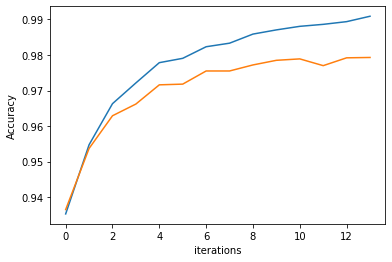

Train Accuracy: 0.99
Test Accuracy:0.98


In [10]:
# Plotting chart of training and testing accuracy as a function of iterations

iterations = list(range(epochs))
plt.plot(iterations, training_accuracy, label='Train')
plt.plot(iterations, testing_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('iterations')
plt.show()
print("Train Accuracy: {0:.2f}".format(training_accuracy[-1]))
print("Test Accuracy:{0:.2f}".format(testing_accuracy[-1]))

#### References:

Aggarwal, C. C. (2018). Neural Networks and Deep Learning: A Textbook (1st ed. 2018 ed.). Springer. 

Dabbura, I. (2019, September 3). Coding Neural Network — Forward Propagation and Backpropagtion. Retrieved from https://towardsdatascience.com/coding-neural-network-forward-propagation-and-backpropagtion-ccf8cf369f76 

Nagyfi, R. (2018, December 3). The differences between Artificial and Biological Neural Networks. Retrieved from https://towardsdatascience.com/the-differences-between-artificial-and-biological-neural-networks-a8b46db828b7 

Rungta, K. (2020, September 21). Back Propagation Neural Network: Explained With Simple Example. Retrieved from https://www.guru99.com/backpropogation-neural-network.html 

Wylie, C. O. (2018, April 5). Choosing the right activation function in a neural network. Retrieved from https://opendatascience.com/choosing-the-right-activation-function-in-a-neural-network/ 